In [455]:
import pandas as pd
import numpy as np
pd.set_option('display.precision',3)
pd.options.display.float_format = '{:20,.2f}'.format
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [432]:
data = pd.read_json("data/data.json")

create label for Fraud

In [434]:
data["Fraud"] = data["acct_type"].apply(lambda x: 1 if x =="fraudster" or x=="fraudster_att" or x=="fraudster_event" else 0)



compare numerical value of Fraud vs not Fraud

In [443]:
compare = pd.DataFrame()

In [444]:
compare["fraud_mean"] = data[data["Fraud"] == 1].describe().iloc[1]
compare["not_fraud_mean"] = data[data["Fraud"] == 0].describe().iloc[1]
compare["diff"]= np.abs(compare["fraud_mean"] -compare["not_fraud_mean"] ).astype(float)

In [440]:
compare

,fraud_mean,premium_mean
approx_payout_date,"1,347,687,343.16","1,351,254,483.07"
body_length,"1,508.89","3,886.99"
channels,4.15,6.38
delivery_method,0.07,0.48
event_created,"1,345,333,444.02","1,345,873,604.53"
event_end,"1,347,255,379.35","1,350,822,491.63"
event_published,"1,318,542,205.95","1,342,905,384.97"
event_start,"1,346,777,043.62","1,350,544,896.48"
fb_published,0.02,0.14
gts,"1,911.21","2,481.68"


Look at Number of Payouts and Num of Orders for Fraud and not Fraud

These 2 columns are likley leakage

Maybe Sale duration are leakage as well?

In [26]:
data.groupby("acct_type").describe()["num_payouts"]

,count,mean,std,min,25%,50%,75%,max
acct_type,,,,,,,,
fraudster,437.00,1.54,4.78,0.00,0.00,0.00,0.00,29.00
fraudster_att,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fraudster_event,851.00,0.10,0.61,0.00,0.00,0.00,0.00,11.00
locked,54.00,25.02,63.11,0.00,0.00,1.00,13.00,314.00
premium,"12,373.00",37.43,132.75,0.00,0.00,2.00,15.00,"1,858.00"
spammer,1.00,2.00,nan,2.00,2.00,2.00,2.00,2.00
spammer_limited,218.00,17.12,29.07,0.00,2.00,6.00,19.75,189.00
spammer_noinvite,84.00,8.93,12.28,0.00,1.00,4.00,10.75,58.00
spammer_warn,144.00,63.81,166.02,0.00,2.00,9.00,33.00,811.00


In [446]:
data.groupby("acct_type").describe()["num_order"]

,count,mean,std,min,25%,50%,75%,max
acct_type,,,,,,,,
fraudster,437.00,3.98,7.92,0.00,1.00,2.00,4.00,88.00
fraudster_att,5.00,4.80,5.89,0.00,0.00,2.00,9.00,13.00
fraudster_event,851.00,4.81,10.41,0.00,0.00,2.00,5.00,140.00
locked,54.00,21.94,39.05,1.00,3.00,7.00,24.25,237.00
premium,"12,373.00",30.53,97.96,0.00,3.00,9.00,26.00,"2,000.00"
spammer,1.00,6.00,nan,6.00,6.00,6.00,6.00,6.00
spammer_limited,218.00,36.69,181.98,1.00,3.00,10.00,23.00,"2,000.00"
spammer_noinvite,84.00,13.92,21.21,1.00,2.00,6.50,15.25,137.00
spammer_warn,144.00,36.56,98.67,1.00,4.00,11.50,28.00,899.00


EDA on some columns where the difference between the two group is large

In [447]:
fraud = data[data["Fraud"]==1]
not_fraud = data[data["Fraud"]==0]

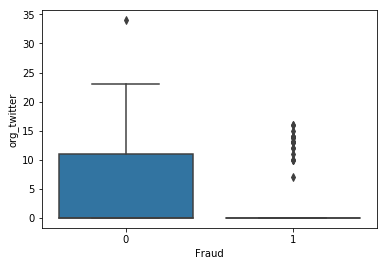

In [463]:
sns.boxplot(data.Fraud,data["org_twitter"])

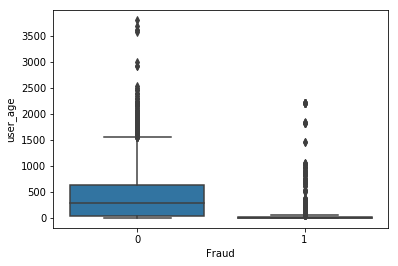

In [464]:
sns.boxplot(data.Fraud,data["user_age"])

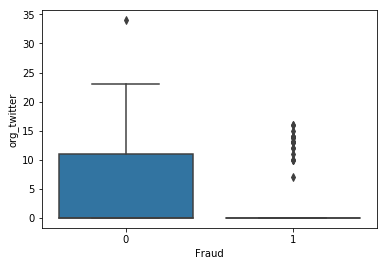

In [465]:
sns.boxplot(data.Fraud,data["org_twitter"])

email domain fraud vs not fraud, fraud use alot more yahoo

In [467]:
data[data["Fraud"] == 1]["email_domain"].value_counts(
).head(10)

gmail.com         345
yahoo.com         284
hotmail.com       101
ymail.com          44
aol.com            40
lidf.co.uk         35
live.fr            33
live.com           33
yahoo.co.uk        26
rocketmail.com     20
Name: email_domain, dtype: int64

In [468]:
data[data["Fraud"] == 0]["email_domain"].value_counts(
).head(10)

gmail.com            2752
yahoo.com             508
hotmail.com           298
aol.com               158
me.com                 71
comcast.net            58
generalassemb.ly       58
kineticevents.com      52
live.com               47
improvboston.com       46
Name: email_domain, dtype: int64

### create data for model

label econder

In [515]:
label = LabelEncoder()
email = label.fit_transform(data["email_domain"])
data["venue_state"].fillna("undefine",inplace= True)
state = label.fit_transform(data["venue_state"])

In [516]:
data["email_domain2"]= email
data["state2"] = state

payout2 for numerical value for payout, use enocer later to fix this

In [517]:
data["payout_type2"] = data["payout_type"].map({"ACH":1,"CHECK":2})

In [518]:
data["payout_type2"].fillna(3,inplace = True)

Feature Used.

"body_length","channels","delivery_method","fb_published","gts","org_facebook","org_twitter","user_age","has_header"

"venue_longitude","payout_type2","user_type","user_created","name_length",'email_domain2'


In [595]:
y = data["Fraud"]
X = data[["body_length","channels","delivery_method","fb_published",
          "gts","org_facebook","org_twitter","user_age","has_header","venue_longitude","payout_type2","user_type","user_created","name_length",
          'email_domain2',"sale_duration"]]





fill all header nan with na, the rest with median

In [596]:
df = pd.concat([y,X],axis =1)
df["has_header"].fillna(0,inplace=True)
df.fillna(df.median(),inplace= True)

In [597]:
y = df["Fraud"]
X = df[["body_length","channels","delivery_method",
        "fb_published","gts","org_facebook","org_twitter","user_age","has_header","venue_longitude","payout_type2","user_type","user_created","name_length",'email_domain2',"sale_duration"]]




In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3, random_state=101,stratify =y)

random forest model with 1000 trees

In [599]:
rf = RandomForestClassifier(n_estimators=1000)
rf_model = rf.fit(X_train,y_train)
print(classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3914
           1       0.93      0.82      0.87       388

   micro avg       0.98      0.98      0.98      4302
   macro avg       0.96      0.91      0.93      4302
weighted avg       0.98      0.98      0.98      4302



<BarContainer object of 15 artists>

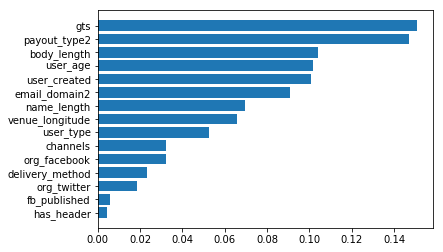

In [483]:
feat = pd.DataFrame()
feat["Featues"] = X.columns
feat["Importance"] = rf.feature_importances_
feat.sort_values("Importance",inplace = True)
plt.barh(feat.Featues,feat.Importance)

### Tune Hypterparameter

In [605]:
rf = RandomForestClassifier(n_estimators=1000,max_features=9)
rf_model = rf.fit(X_train,y_train)
print(classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3914
           1       0.93      0.81      0.87       388

   micro avg       0.98      0.98      0.98      4302
   macro avg       0.96      0.90      0.93      4302
weighted avg       0.98      0.98      0.98      4302



In [526]:
rf = RandomForestClassifier(n_estimators=1000,max_features=10,max_depth=15)
rf_model = rf.fit(X_train,y_train)
print(classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3914
           1       0.91      0.73      0.81       388

   micro avg       0.97      0.97      0.97      4302
   macro avg       0.94      0.86      0.90      4302
weighted avg       0.97      0.97      0.97      4302



Gradient BOost

In [606]:
gb= GradientBoostingClassifier(learning_rate=0.21,n_estimators=1000)
gb_model = gb.fit(X_train,y_train)
print(classification_report(y_test,gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3914
           1       0.91      0.86      0.88       388

   micro avg       0.98      0.98      0.98      4302
   macro avg       0.95      0.92      0.94      4302
weighted avg       0.98      0.98      0.98      4302



In [607]:
gb= GradientBoostingClassifier(learning_rate=0.32,n_estimators=1000)
gb_model = gb.fit(X_train,y_train)
print(classification_report(y_test,gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3914
           1       0.92      0.85      0.88       388

   micro avg       0.98      0.98      0.98      4302
   macro avg       0.95      0.92      0.94      4302
weighted avg       0.98      0.98      0.98      4302



In [608]:
gb= GradientBoostingClassifier(learning_rate=0.2,n_estimators=800)
gb_model = gb.fit(X_train,y_train)
print(classification_report(y_test,gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3914
           1       0.93      0.86      0.89       388

   micro avg       0.98      0.98      0.98      4302
   macro avg       0.96      0.93      0.94      4302
weighted avg       0.98      0.98      0.98      4302



### Best Model

In [609]:
gb= GradientBoostingClassifier(learning_rate=0.23,n_estimators=700)
gb_model = gb.fit(X_train,y_train)
print(classification_report(y_test,gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3914
           1       0.93      0.86      0.89       388

   micro avg       0.98      0.98      0.98      4302
   macro avg       0.96      0.93      0.94      4302
weighted avg       0.98      0.98      0.98      4302



### Set my Own threshold

In [610]:
result = pd.DataFrame(gb_model.predict_proba(X_test), columns=[["Not_Fraud","Fraud"]])

In [611]:
result["True"] = y_test.reset_index()["Fraud"]

In [612]:
def my_threshold(x,prob):
    return x>= prob

In [613]:
result["Threshold_0.1"] = my_threshold(result["Fraud"],0.1).astype(int)
result["Threshold_0.15"] = my_threshold(result["Fraud"],0.15).astype(int)
result["Threshold_0.2"] = my_threshold(result["Fraud"],0.2).astype(int)
result["Threshold_0.25"] = my_threshold(result["Fraud"],0.25).astype(int)
result["Threshold_0.35"] = my_threshold(result["Fraud"],0.35).astype(int)

In [614]:
print("Threshold_0.1:")
print(classification_report(y_test,result["Threshold_0.1"] ))
print("Threshold_0.15")
print(classification_report(y_test,result["Threshold_0.15"] ))
print("Threshold_0.2")
print(classification_report(y_test,result["Threshold_0.2"] ))
print("Threshold_0.25")
print(classification_report(y_test,result["Threshold_0.25"] ))
print("Threshold_0.35")
print(classification_report(y_test,result["Threshold_0.35"] ))

Threshold_0.1:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3914
           1       0.87      0.90      0.88       388

   micro avg       0.98      0.98      0.98      4302
   macro avg       0.93      0.94      0.94      4302
weighted avg       0.98      0.98      0.98      4302

Threshold_0.15
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3914
           1       0.89      0.89      0.89       388

   micro avg       0.98      0.98      0.98      4302
   macro avg       0.94      0.94      0.94      4302
weighted avg       0.98      0.98      0.98      4302

Threshold_0.2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3914
           1       0.89      0.89      0.89       388

   micro avg       0.98      0.98      0.98      4302
   macro avg       0.94      0.94      0.94      4302
weighted avg       0.98      0

In [512]:
data[data["Fraud"] == 1]["venue_state"].value_counts().head(10)

           133
FL          88
NY          70
CA          64
London      57
Gt Lon      42
TX          37
GA          25
PA          25
England     18
Name: venue_state, dtype: int64

In [510]:
data[data["Fraud"] == 0]["venue_state"].value_counts()

                                           2492
CA                                         1313
NY                                          692
TX                                          450
IL                                          337
FL                                          318
London                                      275
MA                                          255
Ontario                                     245
Gt Lon                                      210
GA                                          208
WA                                          195
ON                                          191
NC                                          189
PA                                          185
CO                                          185
VA                                          184
OH                                          178
MD                                          165
England                                     156
DC                                      

In [ ]:
import requests
import time

In [562]:
class EventAPIClient:
    """Realtime Events API Client"""
    
    def __init__(self, first_sequence_number=0,
                 api_url = 'https://hxobin8em5.execute-api.us-west-2.amazonaws.com/api/',
                 api_key = 'vYm9mTUuspeyAWH1v-acfoTlck-tCxwTw9YfCynC',
                 db = None):
        """Initialize the API client."""
        self.next_sequence_number = first_sequence_number
        self.api_url = api_url
        self.api_key = api_key
        
    def save_to_database(self, row):
        """Save a data row to the database."""
        print("Received data:\n" + repr(row) + "\n")  # replace this with your code

    def get_data(self):
        """Fetch data from the API."""
        payload = {'api_key': self.api_key,
                   'sequence_number': self.next_sequence_number}
        response = requests.post(self.api_url, json=payload)
        data = response.json()
        self.next_sequence_number = data['_next_sequence_number']
        return data['data']
    
    def collect(self, interval=30):
        """Check for new data from the API periodically."""
        while True:
            print("Requesting data...")
            data = self.get_data()
            if data:
                print("Saving...")
                for row in data:
                    self.save_to_database(row)
            else:
                print("No new data received.")
            print(f"Waiting {interval} seconds...")
            time.sleep(interval)


# Usage Example


In [557]:
client = EventAPIClient()
test = client.get_data()

In [572]:
test_data = pd.DataFrame(test)

In [573]:
test_data.columns

Index(['body_length', 'channels', 'country', 'currency', 'delivery_method',
       'description', 'email_domain', 'event_created', 'event_end',
       'event_published', 'event_start', 'fb_published', 'has_analytics',
       'has_header', 'has_logo', 'listed', 'name', 'name_length', 'object_id',
       'org_desc', 'org_facebook', 'org_name', 'org_twitter', 'payee_name',
       'payout_type', 'previous_payouts', 'sale_duration', 'sequence_number',
       'show_map', 'ticket_types', 'user_age', 'user_created', 'user_type',
       'venue_address', 'venue_country', 'venue_latitude', 'venue_longitude',
       'venue_name', 'venue_state'],
      dtype='object')

In [583]:
a = list(data.columns)
b = list(test_data.columns)

In [584]:
list(set(a) - set(b))

['state2',
 'payout_type2',
 'email_domain2',
 'gts',
 'approx_payout_date',
 'num_order',
 'num_payouts',
 'sale_duration2',
 'acct_type',
 'Fraud']